### Test the Girwan-Newman from networkx
- only in the development version, from github

---


#### Load my benchmark graph creator

In [1]:
import sys
sys.path.append('../my_modules/')
from girwan_newman_benchmark import create_GN_benchmark_graph

#### Load the girwan newman function from netwrokx

In [2]:
from networkx.algorithms.community import girvan_newman

#### Run it

- it take some minutes to finish

In [3]:
test_g=create_GN_benchmark_graph(k_in=14)
gn_test_res=girvan_newman(test_g)

#### After some cuts, the results is good

- it only gives back node list, so we cannot visualize the graph here


In [4]:
print gn_test_res[2]

([128, 129, 130, 131, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231], [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331], [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431])


#### Calculate modularity for each level

- with the community module
    - http://perso.crans.org/aynaud/communities/index.html

In [12]:
from community import modularity
def my_modularity(nx_gn_output_level,test_g):
    partition=dict()
    for partitions,i in zip(nx_gn_output_level,range(len(nx_gn_output_level))):
        for node in partitions:
            partition[node]=i
    return modularity(partition,test_g)

In [13]:
mods=[my_modularity(x,test_g) for x in gn_test_res]

### Modularity is highest after the 3rd cut, good

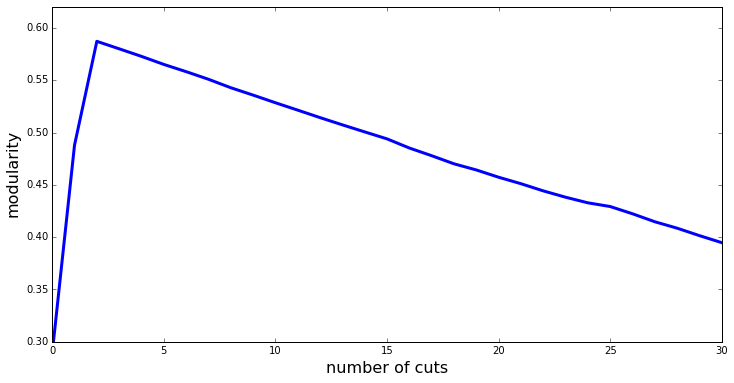

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots()
fig.set_size_inches(12,6)
ax.plot(mods,lw=3)
ax.set_xlim(0,30)
ax.set_ylim(0.3,0.62)
ax.set_xlabel('number of cuts',fontsize=16)
dump=ax.set_ylabel('modularity',fontsize=16)

### All in all define a wrapper for GN, which selects the level based on modularity

In [26]:
from networkx.algorithms.community import girvan_newman
from community import modularity

def gn_best_partition(graph):
    
    #do all the cuts
    all_levels=girvan_newman(graph)
    
    #calculate modularity for all levels
    level_mods=[nx_gn_output_level_modularity(level,graph) for level in all_levels]
    
    #return the level with the highest modularity
    return all_levels[level_mods.index(max(level_mods))]

    
def nx_gn_output_level_modularity(nx_gn_output_level,test_g):
        partition=dict()
        for partitions,i in zip(nx_gn_output_level,range(len(nx_gn_output_level))):
            for node in partitions:
                partition[node]=i
        return modularity(partition,test_g)   

In [29]:
new_test_g=create_GN_benchmark_graph(k_in=14)
best_res=gn_best_partition(new_test_g)

In [30]:
print best_res

([128, 129, 130, 131, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231], [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331], [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431])
